In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

<h2>Task 1</h2>

**(a)**

Let $\, x_0 = 5 \,$ and $\, x_n = 3x_{n-1} \, \, \text{mod 150}. \,$ We'll make a script to find $\, x_1,...,x_{10}. \,$

First we'll note that one of the most common approaches to generating pseudorandom numbers starts with an initial value $\, x_0, \,$ called the seed, and then recursively computes successive values $\, x_n, \, n \ge 1, \,$ by letting

$$ x_n = a x_{n-1} \quad \text{mod} \, m $$

where $\, a \,$ and $\, m \,$ are given positive integers, and where the above means that $\, a x_{n-1} \,$ is divided by $\, m \,$ and the remainder is taken as the value of $\, x_n. \,$ Thus, each $\, x_n \,$ is either $\, 0,1,...,m-1 \,$ and the quantity $\, \frac{x_n}{m}, \,$ called a *pseudorandom* number, is taken as an approximation to the value of a random variable $\, U \sim \text{Uniform}(0,1). \,$ This method is known as the *multiplicative congruental method*.



In [15]:
def multiplicative_congruental_method(x0, n, m, a):
    if x0 == 0:
        raise ValueError('Seed x0 must be non-zero')
    r = np.zeros(n)
    xn = x0
    for i in range(n):
        xn = (a * xn) % m
        r[i] = xn
    return r

In [16]:
multiplicative_congruental_method(x0=5, n=10, m=150, a=3)

array([ 15.,  45., 135., 105.,  15.,  45., 135., 105.,  15.,  45.])

- Note that these pseudorandom numbers are the raw values of the sequence (i.e., they are not normalized to $\, \text{Uniform}(0,1)) \,$

**(b)**

Let $\, x_0 = 3 \,$ and $\, x_n = 5x_{n-1} + 7 \, \, \text{mod 200}. \,$ We'll make a script to find $\, x_1,...,x_{10}. \,$

This method is known as the linear congruental generator (LCG).

In [18]:
def LCG(x0, n, m, a, c):
    r = np.zeros(n)
    xn = x0
    for i in range(n):
        xn = (a * xn + c) % m
        r[i] = xn
    return r

In [20]:
LCG(x0=3, n=10, m=200, a=5, c=7)

array([ 22., 117., 192., 167.,  42.,  17.,  92.,  67., 142., 117.])

- Note that these pseudorandom numbers are the raw values of the sequence (i.e., they are not normalized to $\, \text{Uniform}(0,1)) \,$

<h2>Task 2</h2>

We'll use simulation to approximate the following integral

$$ \int_{-\infty}^{\infty} e^{-x^2} dx = \sqrt{\pi}. $$

More precisely, we'll use a Monte Carlo method called *importance sampling*.

\begin{equation*}
    \int_{\mathbb{X}} f(x) \, dx = \int_{\mathbb{X}} \, \frac{f(x)} {q(x)} \, q(x) \, dx = \mathbb{E}_q \left[\frac{f(X)} {q(X)} \right] \approx \frac{1}{n} \sum_{i=1}^{n} \frac{f(X_i)} {q(X_i)},
\end{equation*}

where $\, X_i \sim q. \,$

$\large f(X)$ 
- the target distribution
- the distribution that we're interested in

$\large q(X)$ 
- the proposal density
- a simpler distribution that we're generating samples from
- must cover the support of $\, f \,$

In [14]:
def f(x):
    return np.exp(-x**2)

In [15]:
def q(x, mu=0, sigma=1):
    return (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(x - mu)**2 / (2 * sigma**2))

In [16]:
def eval_integral(func):
    result, error = quad(func, -np.inf, np.inf)
    return result, error

In [17]:
def visualize():
    x = np.linspace(-3, 3, 1000)
    fx = f(x)
    fig, ax = plt.subplots(figsize=(8,6))
    sigmas = np.linspace(0.4, 1, 7)
    for sigma in sigmas:
        qx = q(x, sigma=sigma)
        ax.plot(x, qx, label=f'N(0, {sigma:.1f})')
    ax.plot(x, fx, label='Target distribution', color='k')
    ax.legend()

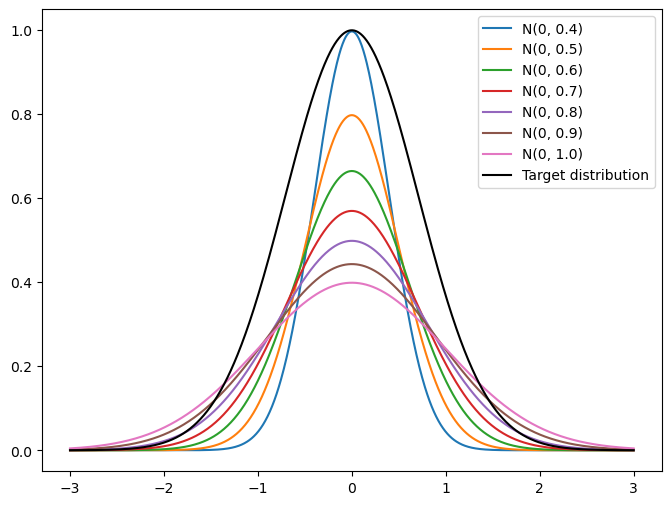

In [18]:
visualize()

- As can be seen, the target distribution *highly* resembles a normal distribution.
- Hence, we'll choose a normal distribution as our proposal distribution $\, q. \,$

In [19]:
def MC_importance_sampling(n, sigma):
    X = np.random.normal(loc=0.0, scale=sigma, size=n)
    fx = f(X)
    qx = q(X)
    return np.mean(fx / qx)

In [21]:
def compare_proposal_distributions(n):
    true_integral_val = np.sqrt(np.pi)
    sigmas = np.linspace(0.4, 1, 7)
    for sigma in sigmas:
        MC_est = MC_importance_sampling(n=n, sigma=sigma)
        error = np.abs(MC_est - true_integral_val)
        print(f'Proposal distribution: N(0, {sigma:.1f}^2)')
        print(f'MC estimate: {MC_est:.10f}')
        print(f'Error: {error:.10f}')
        print()

In [22]:
compare_proposal_distributions(n=100000000)

Proposal distribution: N(0, 0.4^2)
MC estimate: 2.3272813629
Error: 0.5548275120

Proposal distribution: N(0, 0.5^2)
MC estimate: 2.2419926603
Error: 0.4695388094

Proposal distribution: N(0, 0.6^2)
MC estimate: 2.1494047986
Error: 0.3769509477

Proposal distribution: N(0, 0.7^2)
MC estimate: 2.0534931159
Error: 0.2810392650

Proposal distribution: N(0, 0.8^2)
MC estimate: 1.9572973640
Error: 0.1848435130

Proposal distribution: N(0, 0.9^2)
MC estimate: 1.8631493767
Error: 0.0906955258

Proposal distribution: N(0, 1.0^2)
MC estimate: 1.7724887430
Error: 0.0000348921



- It seems that the magical standard normal distribution $\, N(0,1) \,$ does the best job as the proposal distribution.

In [23]:
# SciPy
eval_integral(func=f)

(1.7724538509055159, 1.4202637059452923e-08)

<h2>Task 3</h2>

The expectation of a continuous random variable $\, U \,$ can be written as

\begin{equation*}
    \mathbb{\mathbb{E}}[g(U)] = \int_{-\infty}^{\infty} g(u) f_U(u) \, du,
\end{equation*}

where $\, g(u) \,$ is any function of $\, U, \,$ and $\, f_U(u) \,$ is the PDF of $\, U. \,$ 

Let $\, U \sim \text{Uniform}(0,1). \,$ Then

$$
f_{U}(u) =
\begin{cases} 
1 & \text{, } 0 \le x \le 1 \\
0 & \text{, else}
\end{cases}
$$

Hence, we have

\begin{equation*}
    \mathbb{\mathbb{E}}[g(U)] = \int_{-\infty}^{\infty} g(u) f_U(u) \, du = \int_{0}^{1} g(u) \cdot 1 \, du = \int_{0}^{1} g(u) \, du.
\end{equation*}

<br>

Let $\, U \,$ be uniform on $\, (0,1). \,$ We'll use simulation to approximate $\, \text{Cov} \left(U, e^U \right), \,$ and compare it to the exact answer.

$$ \text{Cov} \left(U, e^U \right) = \mathbb{E} \left[U e^U \right] - \mathbb{E}[U] \, \mathbb{E} [e^U] $$

\begin{equation*}
    \mathbb{E}[U] = \int_{-\infty}^{\infty}u \, f_U(u) \, du = \int_{0}^{1} u \cdot 1 \, du = \int_{0}^{1} u \, du = \Big/_{0}^{1} \frac{u^2}{2} = \frac{1}{2}
\end{equation*}

\begin{equation*}
    \mathbb{E}[e^U] = \int_{-\infty}^{\infty} e^u \, f_U(u) \, du = \int_{0}^{1} e^u \cdot 1 \, du = \int_{0}^{1} e^u \, du = \Big/_{0}^{1} e^u = e - 1
\end{equation*}

\begin{equation*}
    \mathbb{E} \left[U e^U \right] = \int_{-\infty}^{\infty} u e^u f_U(u) \, du = \int_{0}^{1} u e^u \cdot 1 \, du = \int_{0}^{1} u e^u \, du = u e^u - \int 1 \cdot e^u \, du = u e^u - e^u \quad \rightarrow \Big/_{0}^{1} u e^u - e^u = 1
\end{equation*}

Hence

$$ \text{Cov} \left(U, e^U \right) = \mathbb{E} \left[U e^U \right] - \mathbb{E}[U] \, \mathbb{E} [e^U] = 1 - \frac{1}{2} (e - 1) $$

In [2]:
def simulate_cov(n):
    U = np.random.uniform(low=0.0, high=1.0, size=n)
    eU = np.exp(U)
    sample_cov = np.cov(U, eU, ddof=1)[0,1]    # Unbiased cov
    return sample_cov

In [5]:
def error():
    cov_simulated = simulate_cov(n=100000000)
    cov_exact = 1 - (1/2) * (np.exp(1) - 1)
    error = np.abs(cov_exact - cov_simulated) 
    print(f'Simulated covariance: {cov_simulated}')
    print(f'Exact covariance: {cov_exact}')
    print(f'Error: {error}')

In [6]:
error()

Simulated covariance: 0.14086504059147648
Exact covariance: 0.14085908577047745
Error: 5.954820999021226e-06
